Python code to generate the plots from the matlab experiments.

In [31]:
import scipy.io as spio
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [32]:
pwd

'/Users/cdickens/Desktop/high-leverage-rows/figures'

In [33]:

mat_identity = spio.loadmat('../scripts/years/regression/years_identity.mat', squeeze_me=True)
mat_orth = spio.loadmat('../scripts/years/regression/years_orth.mat', squeeze_me=True)
mat_spc3 = spio.loadmat('../scripts/years/regression/years_condition_spc3.mat', squeeze_me=True)
mat_uniform = spio.loadmat('../scripts/years/regression/years_uniform_sampling.mat', squeeze_me=True)


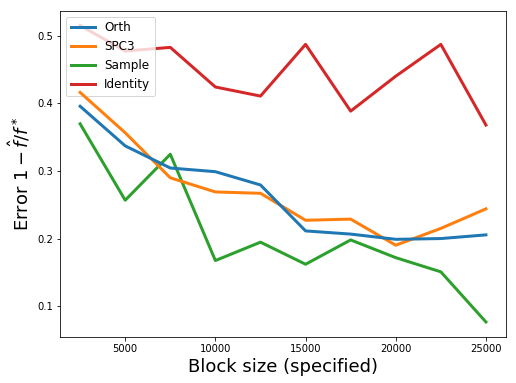

In [35]:
fig, ax = plt.subplots(figsize=(8,6))


ax.plot( mat_orth['block_sizes'], mat_orth['error'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['error'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['error'], label = 'Sample',linewidth=3.0, zorder=4)
ax.plot( mat_identity['block_sizes'], mat_identity['error'], label = 'Identity', linewidth=3.0, zorder=2)


#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Error $1 - \hat{f}/f^*$', fontsize=18)
ax.set_xlabel('Block size (specified)', fontsize=18)
#ax.set_title("Error vs Block Size", fontsize=18)
ax.legend(loc=2, fancybox=True, fontsize=12)



fig.savefig('years_error_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

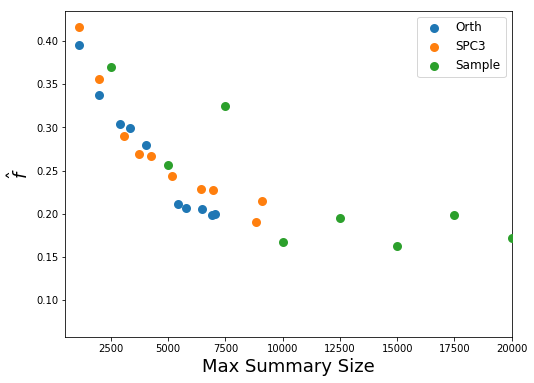

In [36]:
fig, ax = plt.subplots(figsize=(8,6))


ax.scatter( mat_orth['storage'], mat_orth['error'], label = 'Orth', linewidth=3.0, zorder=10)
ax.scatter( mat_spc3['storage'], mat_spc3['error'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.scatter( mat_uniform['block_sizes'], mat_uniform['error'], label = 'Sample',linewidth=3.0, zorder=4)
#ax.plot( mat_identity['storage'], mat_identity['error'], label = 'Identity', linewidth=3.0, zorder=2)


#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('$\hat{f}$', fontsize=18)
ax.set_xlabel('Max Summary Size', fontsize=18)
ax.set_xlim(left=500, right=20000)
#ax.set_title("Error vs Block Size", fontsize=18)
ax.legend(loc=1, fancybox=True, fontsize=12)

Identity method removed as consistently outputting empty blocks and hence $\hat{f}=0$.  The value $\hat{f}$ is the approximation of the LP from the summary.

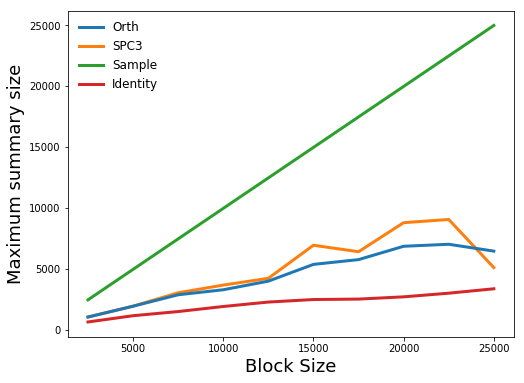

In [37]:
fig, ax = plt.subplots(figsize=(8,6))


ax.plot( mat_orth['block_sizes'], mat_orth['storage'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['storage'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['block_sizes'], label = 'Sample',linewidth=3.0, zorder=4)
ax.plot( mat_identity['block_sizes'],mat_identity['storage'],label = 'Identity', linewidth=3.0, zorder=2)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Maximum summary size', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Max rows stored (in stream) vs Block Size")
ax.legend(loc=0, frameon=False, fontsize=12)

fig.savefig('years_space_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

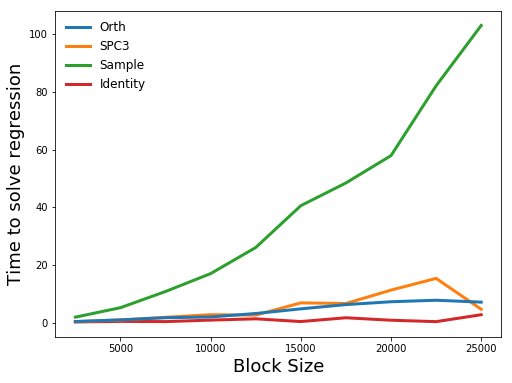

In [38]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot( mat_orth['block_sizes'], mat_orth['approx_regression_time'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['approx_regression_time'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['approx_regression_time'], label = 'Sample',linewidth=3.0, zorder=4)
ax.plot( mat_identity['block_sizes'],mat_identity['approx_regression_time'],label = 'Identity', linewidth=3.0, zorder=2)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Time to solve regression', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Time to solve regression vs Block Size")
ax.legend(loc=0, frameon=False, fontsize=12)

fig.savefig('years_regression_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

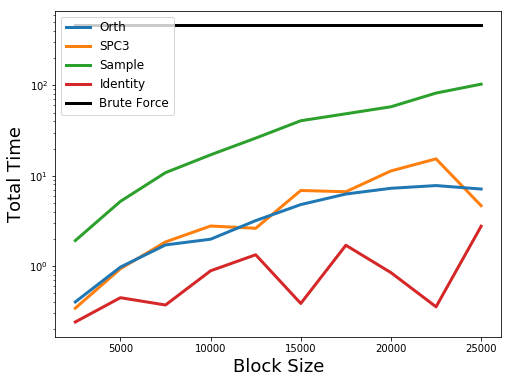

In [41]:
fig, ax = plt.subplots(figsize=(8,6))


ax.plot( mat_orth['block_sizes'], mat_orth['total_time'], label = 'Orth', linewidth=3.0, zorder=10)
ax.plot( mat_spc3['block_sizes'], mat_spc3['total_time'], label = 'SPC3', linewidth=3.0, zorder=8)
ax.plot( mat_uniform['block_sizes'], mat_uniform['approx_regression_time'], label = 'Sample',linewidth=3.0, zorder=4)
ax.plot( mat_identity['block_sizes'], mat_identity['total_time'], label = 'Identity',linewidth=3.0)
ax.plot(mat_spc3['block_sizes'], mat_spc3['full_regression_time'], color='black', label = 'Brute Force',linewidth=3.0)
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Total Time', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Total Time  vs Block Size")
ax.legend(loc=2, fancybox=True, fontsize=12)

fig.savefig('years_total_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)

### Basis times

In [13]:
basis_orth = spio.loadmat('../scripts/years/basis_times/years_condition_spc3_basis_times.mat', squeeze_me=True)
basis_spc3 = spio.loadmat('../scripts/years/basis_times/years_orth_basis_times.mat', squeeze_me=True)


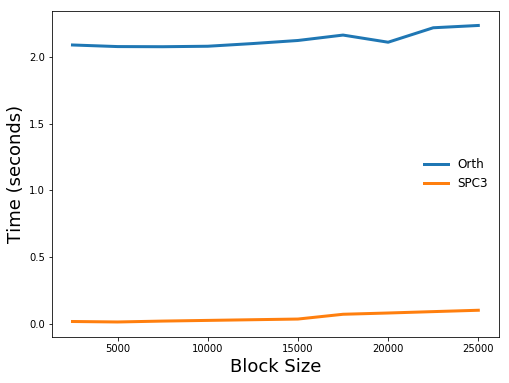

In [18]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot( basis_orth['block_sizes'], basis_orth['time_for_basis'], label = 'Orth' , linewidth=3.0)
ax.plot( basis_spc3['block_sizes'], basis_spc3['time_for_basis'], label = 'SPC3', linewidth=3.0)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel('Time (seconds)', fontsize=18)
ax.set_xlabel('Block Size', fontsize=18)
#ax.set_title("Time to compute basis  vs Block size", fontsize=18)
ax.legend(loc=0, frameon=False, fontsize=12)


fig.savefig('years_basis_time_vs_block_size.pdf', dpi=1000, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=True)